# Erdos Renyi random graph with Python - some examples

### Import needed Packages

In [1]:
import numpy as np
import math
import networkx as net
import matplotlib.pyplot as plt
from pyvis.network import Network as netviz

### Set parameters for the random Graph

In [2]:
N = 100
p = 0.05

### Generate random Graph as `G`

In [3]:
G = net.gnp_random_graph(N,p)

### Check if the Graph is connected and if not choose the largest connected component as `G0`

In [4]:
conn = net.is_connected(G)

if conn:
    print("the graph is connected")
    G0 = G
else:
    GCC = sorted(net.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(GCC[0])
    print("the graph is not connected")

n = len(G0)
print("number of vertices in G0 is %d" %n)

the graph is connected
number of vertices in G0 is 100


### collect the degrees of `G0` in a list

In [5]:
deg = {}   # initialize an empty dictionary
for v in G0.nodes():
    deg[v] = net.degree(G0,v)
print(deg)
deg_val = deg.values()

{0: 2, 1: 4, 2: 6, 3: 8, 4: 2, 5: 4, 6: 5, 7: 6, 8: 8, 9: 3, 10: 4, 11: 9, 12: 6, 13: 6, 14: 3, 15: 7, 16: 5, 17: 2, 18: 4, 19: 1, 20: 7, 21: 7, 22: 5, 23: 6, 24: 4, 25: 1, 26: 5, 27: 8, 28: 4, 29: 7, 30: 5, 31: 6, 32: 5, 33: 5, 34: 4, 35: 8, 36: 3, 37: 13, 38: 5, 39: 11, 40: 6, 41: 2, 42: 5, 43: 7, 44: 4, 45: 3, 46: 5, 47: 5, 48: 3, 49: 9, 50: 3, 51: 5, 52: 6, 53: 9, 54: 5, 55: 5, 56: 4, 57: 6, 58: 8, 59: 9, 60: 2, 61: 5, 62: 3, 63: 3, 64: 5, 65: 5, 66: 3, 67: 3, 68: 6, 69: 3, 70: 4, 71: 3, 72: 8, 73: 5, 74: 4, 75: 3, 76: 3, 77: 6, 78: 4, 79: 8, 80: 3, 81: 5, 82: 4, 83: 5, 84: 3, 85: 7, 86: 11, 87: 12, 88: 3, 89: 6, 90: 4, 91: 6, 92: 2, 93: 2, 94: 2, 95: 7, 96: 3, 97: 3, 98: 5, 99: 6}


### Add a property `size` to each vertex depending on the degree of the vertex

In [6]:
for v in G0.nodes():
    G0.nodes[v]["size"] = math.sqrt(deg[v])*10

### Plot a Histogram of the degrees in `G0`

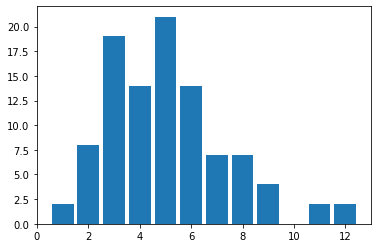

In [7]:
num, bins, obj = plt.hist(deg_val, bins=max(deg_val)-min(deg_val), align="left", rwidth=0.85)

### Visualize graph

In [8]:
viz = netviz(height=800, width=800, notebook=True)
viz.barnes_hut()
viz.from_nx(G0)
viz.show("net.html")

## Define a new function to run repeated simulations

In [6]:
def sim_gnp(n,p,N):
    max_deg = []
    min_deg = []
    for sim in range(N):
        G = net.gnp_random_graph(n,p)
        deg = {}   # initialize an empty dictionary
        for v in G.nodes():
            deg[v] = net.degree(G,v)
        deg_val = deg.values()
        max_deg.append(max(deg_val))
        min_deg.append(min(deg_val))
    return(min_deg, max_deg)
                     

In [7]:
min_deg, max_deg = sim_gnp(1000,0.01, 100)
print(min_deg)
print(max_deg)

[2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 3, 3, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2]
[22, 21, 21, 22, 20, 19, 23, 20, 21, 22, 20, 20, 24, 22, 21, 22, 22, 22, 21, 22, 21, 22, 22, 22, 20, 20, 22, 21, 21, 23, 20, 21, 23, 23, 24, 21, 20, 21, 23, 20, 21, 21, 22, 22, 23, 20, 21, 25, 21, 21, 25, 21, 21, 20, 23, 20, 24, 24, 22, 22, 23, 20, 21, 22, 22, 24, 23, 21, 21, 20, 20, 21, 20, 20, 24, 20, 19, 20, 19, 23, 23, 22, 20, 22, 22, 21, 20, 21, 20, 21, 22, 22, 22, 21, 21, 21, 23, 20, 22, 20]
